导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

## 登月图片消噪

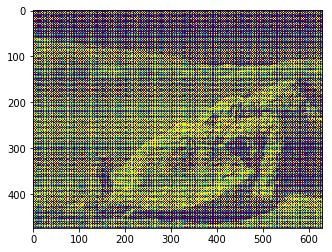

In [3]:
# 读取图片
moon = plt.imread('moonlanding.png')
plt.imshow(moon)

### 图片的灰度化处理
- plt.imshow(arr, cmap='gray') cmap（color map）

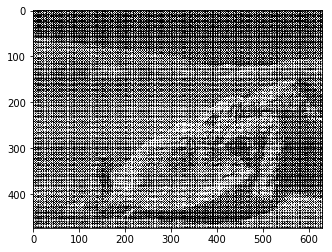

In [9]:
plt.imshow(moon, cmap='gray')

- 将3维的图片，转化为二维的图片（灰度化过程）
    - 最大值
    - 最小值
    - 加权平均

In [10]:
moon.shape

(474, 630)

In [11]:
# 显示scipy.misc中的face图片
import scipy.misc as misc

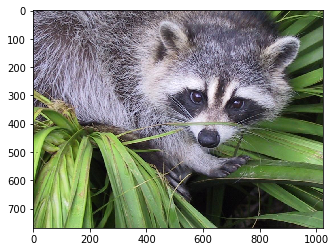

In [12]:
face = misc.face()
plt.imshow(face)

In [13]:
face.shape

(768, 1024, 3)

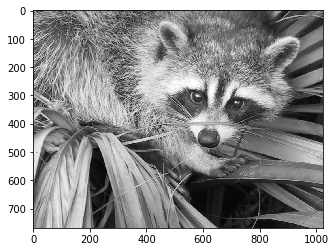

In [15]:
# 最大值-灰度处理( 将R,G,B 三个颜色值转成相似的（基本一样）之后， 再cmap进行映射)
face_max = face.max(axis=2)
plt.imshow(face_max, cmap='gray')

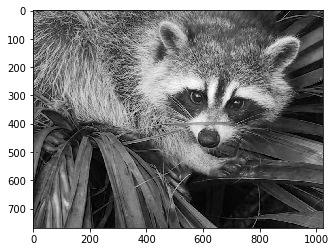

In [16]:
# 最小值
plt.imshow(face.min(axis=2), cmap='gray')

In [17]:
# 加权平均方式
rights = np.array([0.299, 0.457, 0.244])
face_rights = np.dot(face, rights)
face_rights.shape

(768, 1024)

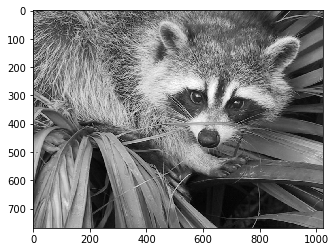

In [19]:
plt.imshow(face_rights, cmap='gray')

### 降噪(消噪)－快速傅里叶变换
- scipy.fftpack

In [20]:
from scipy.fftpack import fft2, ifft2

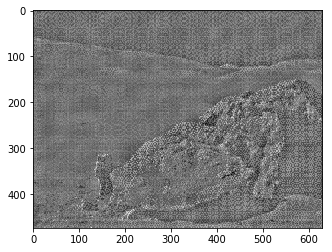

In [61]:
# 将时域转成频域的数
fft_moon = fft2(moon)

# 消噪（去掉高频次的数据）
# np.abs() 高频次也有负值
fft_moon = np.where( np.abs(fft_moon) > 8e2, 0, fft_moon) 

# 将频域的数据转成时域，并提取实数部分
ifft_moon = np.real(ifft2(fft_moon))

plt.imshow(ifft_moon, cmap='gray')

## 积分应用
- 画圆

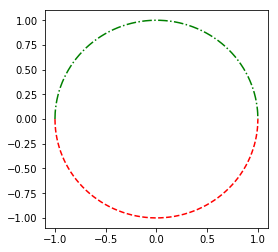

In [67]:
# 修改画布的大小 figure
plt.figure(figsize=(4, 4))  # 3.33cm/英寸

x = np.linspace(-1, 1, num=1000)
y = (lambda x: (1-x**2)**0.5)(x)  # y = f(x)
plt.plot(x, y,'g-.', x, -y, 'r--')  # 同时画两条线, ’g-.‘ 是它前面线的格式和颜色

In [68]:
## 计算半圆的面积- scipy.integrate.quad()
# s = pi*r^2  # r=1  s＝ 3.141592..
from scipy.integrate import quad

In [75]:
s2, err = quad(lambda x: (1-x**2)**0.5, -1, 1)
print(s2, err)

1.5707963267948983 1.0002354500215915e-09


In [76]:
# s2是半圆的面积  ,  pi/2 = s2 ,  pi = s2* 2
pi = s2 * 2 

In [77]:
print(pi)

3.1415926535897967


### scipy的文件操作(I/O)
- scipy.io 模块， 一般的别名 spio
- 格式 .mat文件
- savemat(filename, mdict={key: 数据})
- loadmat(filename) -> mdict

In [78]:
import scipy.io as spio

In [79]:
# 保存数据到mat文件中
spio.savemat('a.mat',
             mdict={'item': np.random.randint(1, 10, size=(10, 3))})

In [80]:
# 读取mat文件的数据
mdict = spio.loadmat('a.mat')
print(type(mdict))
mdict['item']

<class 'dict'>


array([[7, 8, 6],
       [6, 9, 8],
       [5, 5, 3],
       [5, 6, 7],
       [2, 8, 4],
       [8, 5, 6],
       [2, 5, 3],
       [1, 5, 1],
       [1, 4, 7],
       [5, 6, 6]])

## scipy.misc图片处理
- 图片读与写
    - misc方式[过时]
        - misc.imread(filename)
        - misc.imsave(filename, arr, format)
    - imageio模块 [推荐]
        - imageio.imread(filename)
        - imageio.imsave(filename)
- 图片的处理
    - 旋转 misc.imrotate(arr, angle) 
        - angle 角度大于0， 按逆时针旋转
        - angle 角度小于0， 按顺时针旋转
    - 过滤 misc.imfilter(arr, ftype)
        - ftype 有很多，常用： emboss, blur, edge_enhance 等
        - 'blur', 'contour', 'detail', 'edge_enhance', 'edge_enhance_more',
    'emboss', 'find_edges', 'smooth', 'smooth_more', 'sharpen'
    - 重置或缩放 misc.imresize(arr, size)
        - size 是 float值时，表示缩放的倍数, 1.0 代表原大小, 大于1.0则放大。
        - size 是 tuple时， 表示是int数值，表示height 高, width 宽

In [81]:
### scipy.misc读与写图片
from scipy import misc

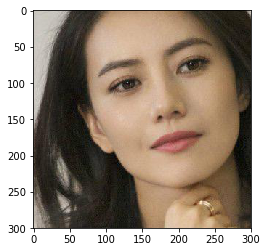

In [85]:
# 读取图片
gyy = misc.imread('gyy.jpg')
plt.imshow(gyy[180:480, 300:600])

In [87]:
# 保存图片
# format 如果不写，则会根据图片文件的扩展名，自动设置文件格式
# 常用： jpeg, png, gif, svg, webp 等
misc.imsave('gyy2.jpg', gyy[180:480, 300:600], format='jpeg')

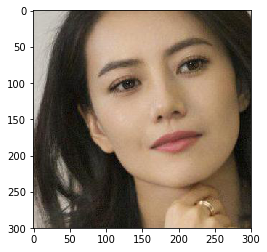

In [98]:
# 使用imageio 来读与写图片
import imageio
gyy2 = imageio.imread('gyy2.jpg')
plt.imshow(gyy2)

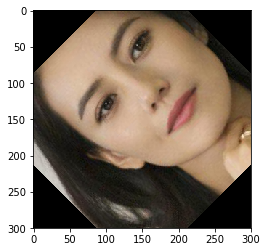

In [90]:
# 使用misc的图片操作，旋转或过滤
# misc.imrotate(arr, angle)
# 不会改变原有图片的大小，可能会出现数据丢失
gyy2_rotate = misc.imrotate(gyy2, angle=45)
plt.imshow(gyy2_rotate)

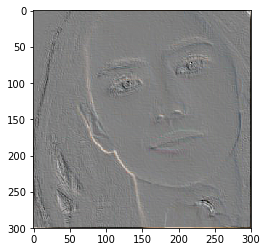

In [99]:
# misc的filter过滤器： misc.imfilter(arr, ftype)
# gyy2_rotate = misc.imrotate(gyy2_rotate, angle=45)
plt.imshow(misc.imfilter(gyy2, ftype='emboss'))

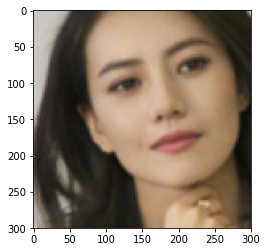

In [101]:
plt.imshow(misc.imfilter(gyy2, ftype='blur')) # 高斯模糊

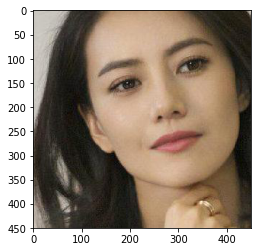

In [102]:
## 缩放或重置图片的大小 misc.imresize(arr, size)
# size 如果是float类型，表示 放大或缩小的倍数
plt.imshow(misc.imresize(gyy2, size=1.5))  # 放大1.5倍

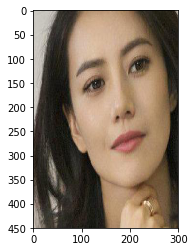

In [104]:
# size = ( h, w)  h,w 必须是int数值，代表高和宽
plt.imshow(misc.imresize(gyy2, size=(450, 300)))

## ndimage 多维度图片处理

In [2]:
from scipy import misc, ndimage

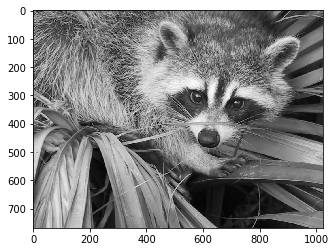

In [3]:
# 读取face图片，并且灰度处理
# 三种方式来进行灰度: max(), min(), np.dot()
face = misc.face(gray=True) 
plt.imshow(face, cmap='gray')

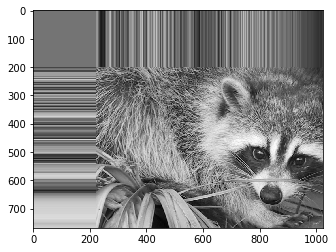

In [4]:
# ndimage移动shift
# shift 如果是一个值，表示按对角线平移，如果是tuple(h, w) 按指定的高和宽平移
# mode 表示 空白区域填充方式: reflect, mirror, 
# mode 可选 ('constant', 'nearest', 'reflect', 'mirror' or 'wrap')
shift_face = ndimage.shift(face, shift=(200, 220), mode='nearest')
plt.imshow(shift_face, cmap='gray')

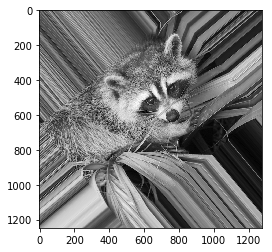

In [5]:
# ndimage的旋转 rotate
# angle 负值按顺时针旋转 ，反则按逆时针旋转
rotate_face = ndimage.rotate(face, angle=40, mode='nearest')
plt.imshow(rotate_face, cmap='gray')

(768, 1024)

/Users/apple/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(1152, 1229)

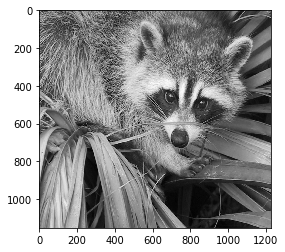

In [6]:
# ndimage的缩放 zoom
display(face.shape)
# zoom 指定缩放的比例
zoom_face = ndimage.zoom(face, zoom=(1.5, 1.2))
display(zoom_face.shape)
plt.imshow(zoom_face, cmap='gray')

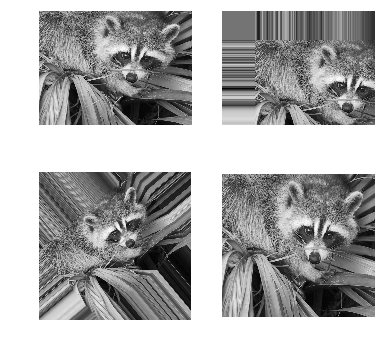

In [15]:
faces = [face, shift_face, rotate_face, zoom_face]
plt.figure(figsize=(6, 6))
for i, face_ in enumerate(faces):
    plt.subplot(2,2,i+1) # 创建子画布
    plt.imshow(face_, cmap=plt.cm.gray) # plt.cm matplotlib中提供的颜色
    plt.axis('off') # 'off' 关闭坐标轴

plt.show()

### ndimage的处理滤波
- 高斯滤波 guassian()
- 中值滤波 median()
- 维纳滤波 wiener()

In [16]:
# 给一张图片加噪 noise
def noise(x, p):
    # A 期望值, k 幅度, theta 相角
    # A*sin( 2*pi*k*x + theta)
    A, k , theta = p
    return A * np.sin(2*np.pi*k*x + theta)

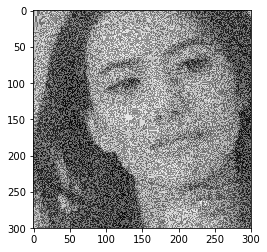

In [22]:
gyy2 = plt.imread('gyy2.jpg')
gyy2 = gyy2.max(axis=2)
p = (100, 0.35, 0)
gyy2 = gyy2+noise(gyy2, p)
plt.imshow(gyy2, cmap='gray')

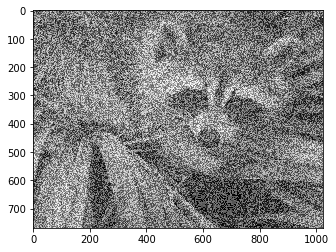

In [32]:
p = (120, 0.35, 0)
noise_face = face+noise(face, p)
plt.imshow(noise_face, cmap='gray')

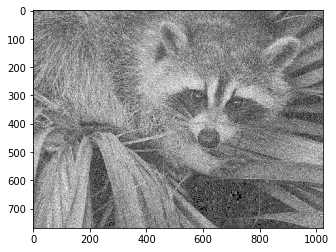

In [36]:
# 高斯滤波 gaussian
plt.imshow(ndimage.gaussian_filter(noise_face, sigma=1), cmap='gray')

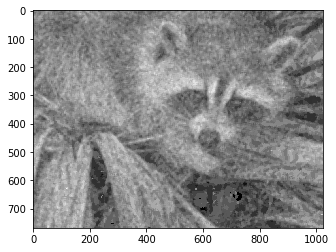

In [41]:
# 中值滤波 median
plt.imshow(ndimage.median_filter(noise_face, size=10), cmap='gray')

/Users/apple/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:950: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)


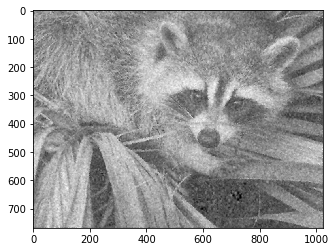

In [45]:
# 维纳滤波 wiener
from scipy.signal import wiener
plt.imshow(wiener(noise_face, mysize=6), cmap='gray')